In [14]:
import configparser
from pathlib import Path
import pandas as pd
import pandas.io.sql as pandasql
from psycopg2 import connect
import numpy
from psycopg2.extras import execute_values
from datetime import datetime
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import rick
import matplotlib.ticker as ticker
from matplotlib import patches
from matplotlib.patches import Rectangle
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import shapely
import matplotlib.patches as patches
CONFIG = configparser.ConfigParser()
CONFIG.read(str(Path.home().joinpath('db.cfg')))
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

# Highway Deep dive

## Baseline Speed Distribution

## All Highways

In [ ]:
highway = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'LAKE SHORE BLVD E' or st_name = 'LAKE SHORE BLVD W' or st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(highway.spd_baseline_overnight, 100)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 60)
ax[0].set_xlim(0, 120)
ax[1].hist(highway.spd_baseline_10pct, 100)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 60)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(highway.spd_baseline_15pct, 100)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 60)
ax[2].set_xlim(0, 120)
ax[3].hist(highway.spd_baseline_20pct, 100)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 60)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(highway.spd_baseline_25pct, 100)
ax[4].set_title('Baseline 25th pct')
ax[4].set_xlim(0, 120)
ax[4].set_ylim(0, 60)

fig.show()

## Gardiner

In [28]:
gardiner = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'GARDINER EXPY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

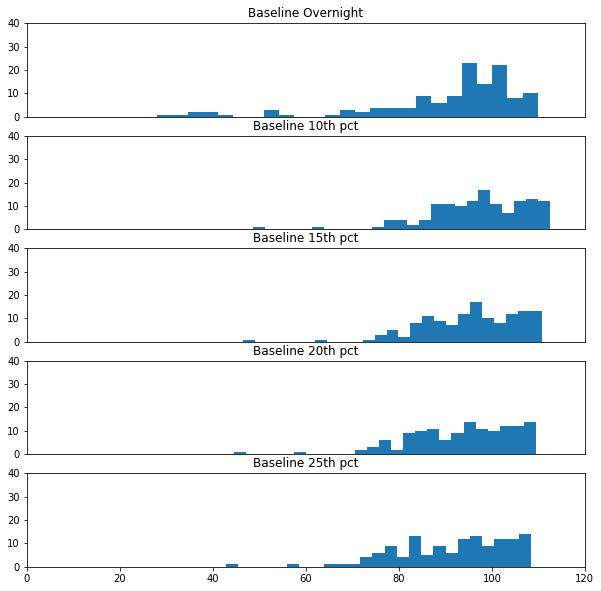

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(gardiner.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(gardiner.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(gardiner.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(gardiner.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(gardiner.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## Lakeshore

In [23]:
lakeshore = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'LAKE SHORE BLVD E' or st_name = 'LAKE SHORE BLVD W')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)


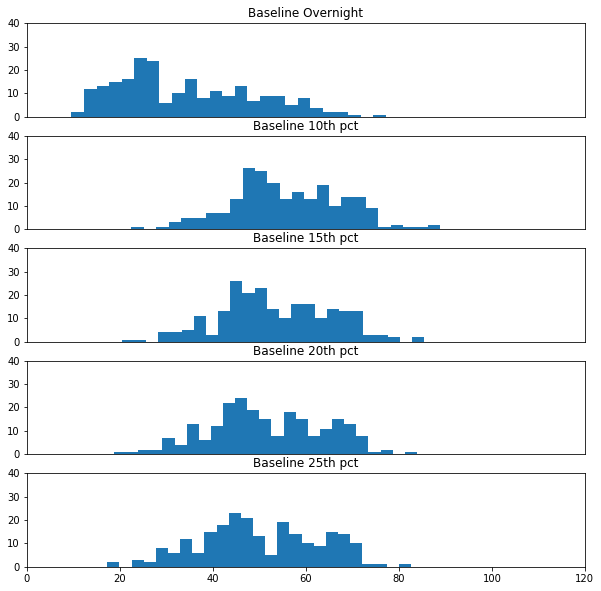

In [27]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(lakeshore.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(lakeshore.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(lakeshore.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(lakeshore.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(lakeshore.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## DVP

In [567]:
dvp = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

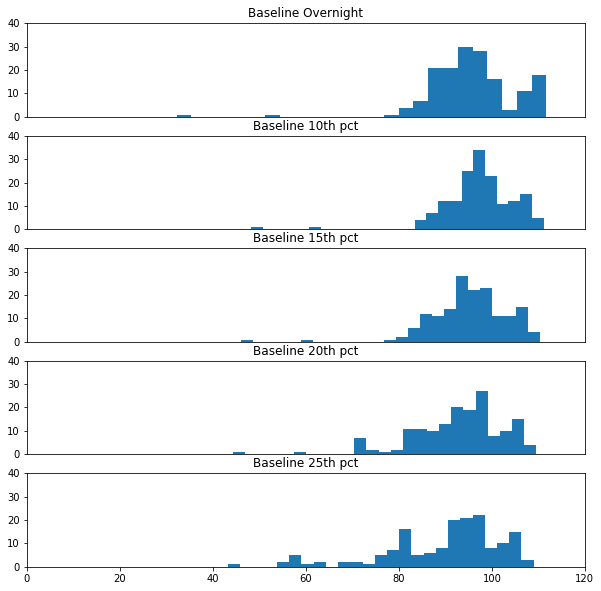

In [568]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(dvp.spd_baseline_overnight, 25)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 40)
ax[0].set_xlim(0, 120)
ax[1].hist(dvp.spd_baseline_10pct, 25)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 40)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(dvp.spd_baseline_15pct, 25)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 40)
ax[2].set_xlim(0, 120)
ax[3].hist(dvp.spd_baseline_20pct, 25)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(dvp.spd_baseline_25pct, 25)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 40)
ax[4].set_xlim(0, 120)

fig.show()

## 401

In [31]:
highway_401 = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name ILIKE '%401%')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)

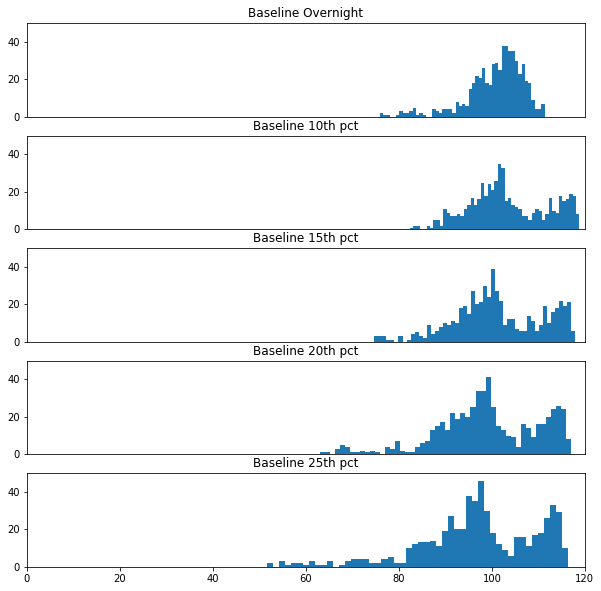

In [39]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(highway_401.spd_baseline_overnight, 50)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 50)
ax[0].set_xlim(0, 120)
ax[1].hist(highway_401.spd_baseline_10pct, 50)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 50)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(highway_401.spd_baseline_15pct, 50)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 50)
ax[2].set_xlim(0, 120)
ax[3].hist(highway_401.spd_baseline_20pct, 50)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 50)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(highway_401.spd_baseline_25pct, 50)
ax[4].set_title('Baseline 25th pct')
ax[4].set_ylim(0, 50)
ax[4].set_xlim(0, 120)

fig.show()

## All highway except Lakeshore

In [569]:
wn_lakeshore = pd.read_sql('''(with highway as (
                         select routing_grid.* from congestion.routing_grid
                         join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
                                                                           where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY')
                         select * from congestion.tt_segments_baseline_v4_2019 inner join 
                         (select distinct segment_id from congestion.segment_links_v4 
                         inner join highway using (link_dir))seg using (segment_id)	
                         inner join congestion.segments_v4 using (segment_id) )''',con)


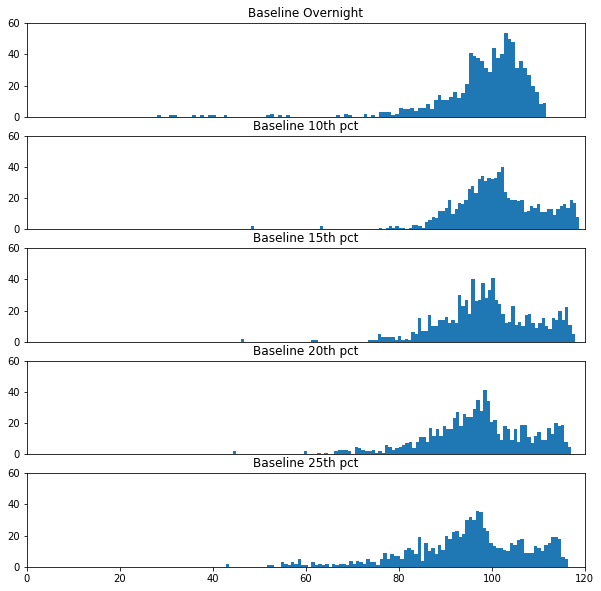

In [570]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
ax[0].hist(wn_lakeshore.spd_baseline_overnight, 100)
ax[0].set_title('Baseline Overnight')
ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 60)
ax[0].set_xlim(0, 120)
ax[1].hist(wn_lakeshore.spd_baseline_10pct, 100)
ax[1].set_title('Baseline 10th pct')
ax[1].set_ylim(0, 60)
ax[1].set_xlim(0, 120)
ax[1].get_xaxis().set_visible(False)
ax[2].hist(wn_lakeshore.spd_baseline_15pct, 100)
ax[2].set_title('Baseline 15th pct')
ax[2].get_xaxis().set_visible(False)
ax[2].set_ylim(0, 60)
ax[2].set_xlim(0, 120)
ax[3].hist(wn_lakeshore.spd_baseline_20pct, 100)
ax[3].set_title('Baseline 20th pct')
ax[3].set_ylim(0, 60)
ax[3].set_xlim(0, 120)
ax[3].get_xaxis().set_visible(False)
ax[4].hist(wn_lakeshore.spd_baseline_25pct, 100)
ax[4].set_title('Baseline 25th pct')
ax[4].set_xlim(0, 120)
ax[4].set_ylim(0, 60)

fig.show()

## Baseline speed differences using 25th mean vs. median

Text(0.5, 1.0, '25th Percentile Mean vs Median')

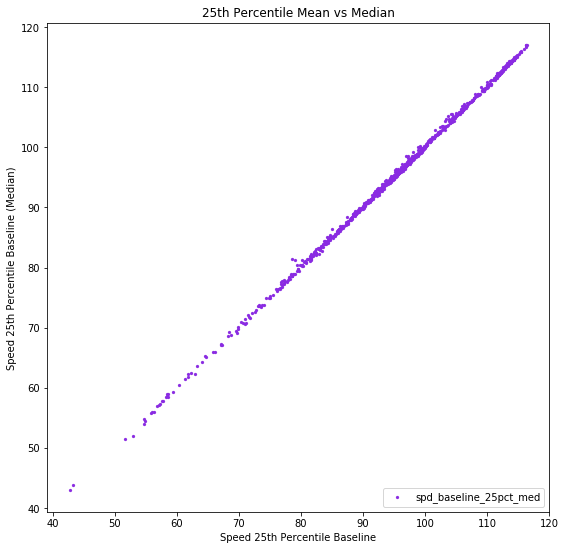

In [571]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_25pct'], wn_lakeshore['spd_baseline_25pct_med'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 25th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline (Median)')
ax.set_title('25th Percentile Mean vs Median')

## Baseline speed differences using overnight speed vs. 10th percentile

Text(0.5, 1.0, 'Overnight vs 10th percentile')

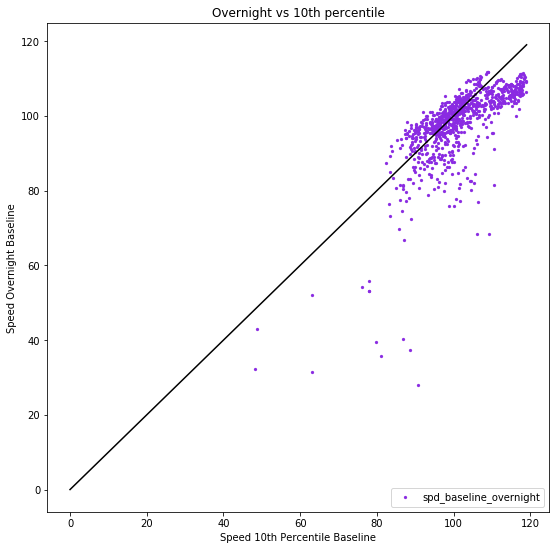

In [573]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_10pct'], wn_lakeshore['spd_baseline_overnight'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 10th Percentile Baseline')
ax.set_ylabel('Speed Overnight Baseline')
ax.set_title('Overnight vs 10th percentile')

## Baseline speed differences using 10th percentile vs. 15th percentile

Text(0.5, 1.0, '10th vs 15th percentile')

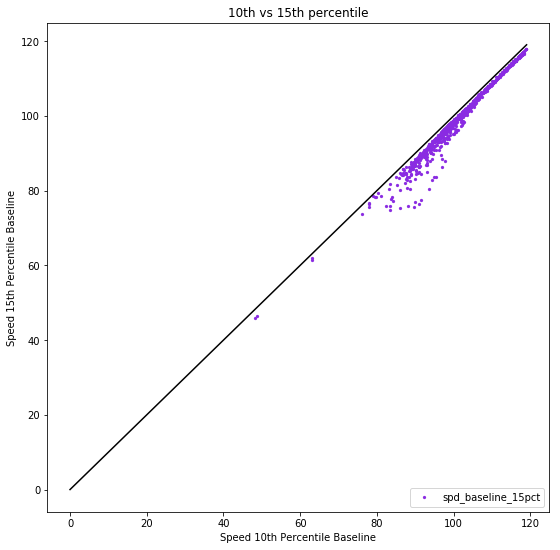

In [575]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_10pct'], wn_lakeshore['spd_baseline_15pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 10th Percentile Baseline')
ax.set_ylabel('Speed 15th Percentile Baseline')
ax.set_title('10th vs 15th percentile')

## Baseline speed differences using 15th percentile vs. 20th percentile

Text(0.5, 1.0, '15th vs 20th percentile')

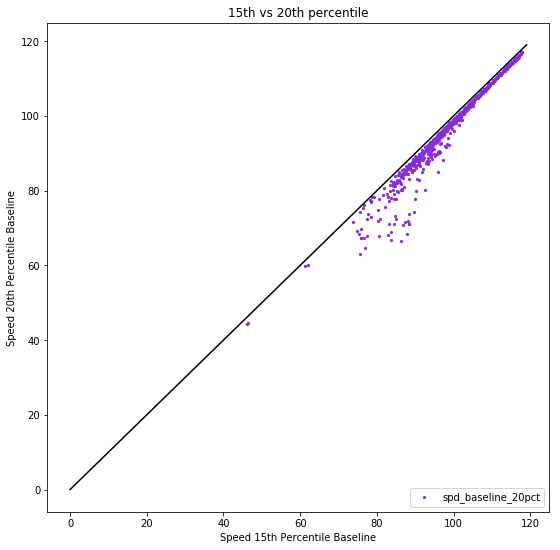

In [577]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_15pct'], wn_lakeshore['spd_baseline_20pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 15th Percentile Baseline')
ax.set_ylabel('Speed 20th Percentile Baseline')
ax.set_title('15th vs 20th percentile')

## Baseline speed differences using 20th percentile vs. 25th percentile

Text(0.5, 1.0, '20th vs 25th Percentile')

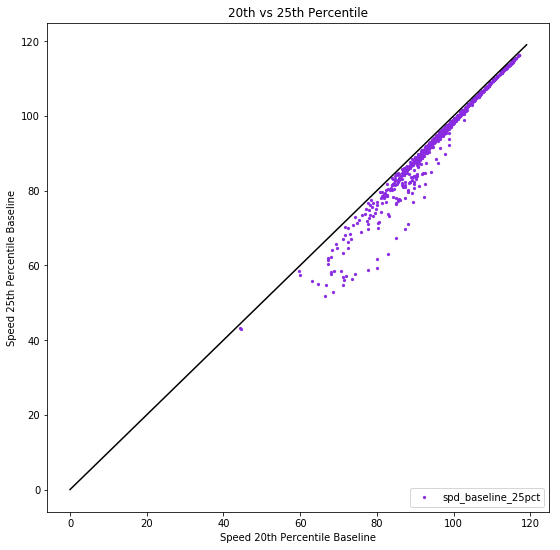

In [579]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_20pct'], wn_lakeshore['spd_baseline_25pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 20th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline')
ax.set_title('20th vs 25th Percentile')

## Baseline speed differences using 10th percentile vs. 25th percentile

Text(0.5, 1.0, '10th vs 25th Percentile')

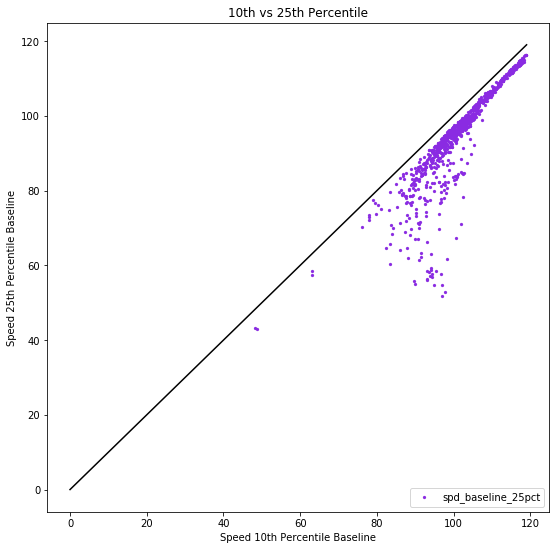

In [580]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(wn_lakeshore['spd_baseline_10pct'], wn_lakeshore['spd_baseline_25pct'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,120), range(0,120), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed 10th Percentile Baseline')
ax.set_ylabel('Speed 25th Percentile Baseline')
ax.set_title('10th vs 25th Percentile')

## Difference in TTI Mean and Median on Highways

Text(0.5, 1.0, 'TTI Mean vs Median')

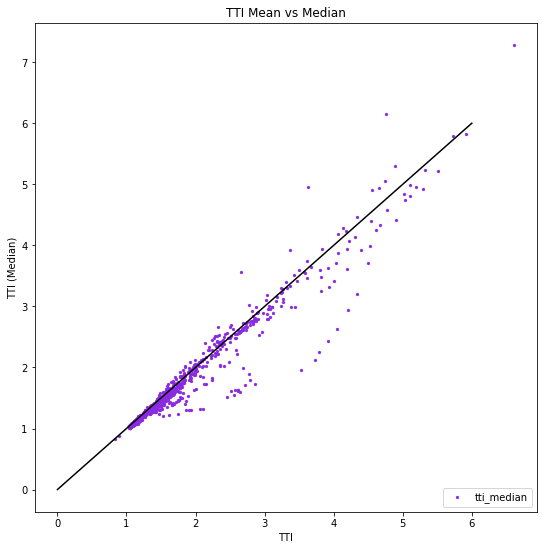

In [2]:
all_baseline = pandasql.read_sql('''
with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )
                         
SELECT segment_id, avg(tti_corr) as tti, avg(tti_med_corr) as tti_median 
FROM congestion.metrics_v4_2019_af_v2
inner join highway_wls using (segment_id)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange	
group by segment_id		''', con)

fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(all_baseline['tti'], all_baseline['tti_median'], marker = '.', linewidths =0.25, c='blueviolet')
ax.plot(range(0,7), range(0,7), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('TTI')
ax.set_ylabel('TTI (Median)')
ax.set_title('TTI Mean vs Median')

# Using 10th percentile speed for baseline instead of 25th percentile

This table uses pct_10th for highway `congestion.metrics_v4_2019_af_v2`

This table uses pct_25th for highway `congestion.metrics_v4_2019_af`

## Differences in TTI

In [4]:
pct_comp_hw = pd.read_sql('''
with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )
select segment_id, time_bin, a.tti_corr as tti_25, b.tti_corr as tti_10 from 
congestion.metrics_v4_2019_af_v2 b
inner join congestion.metrics_v4_2019_af a using (segment_id, time_bin)
inner join highway_wls using (segment_id)
''',con)

Text(0.5, 1.0, 'TTI 25th vs 10th (Highway)')

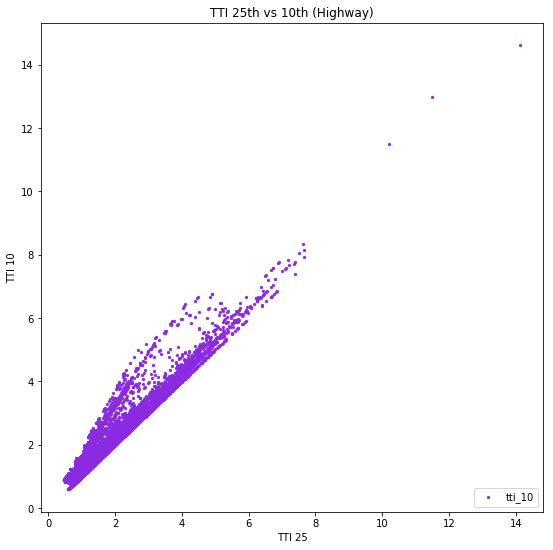

In [5]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(pct_comp_hw['tti_25'], pct_comp_hw['tti_10'], marker = '.', linewidths =0.25, c='blueviolet')
#ax.plot(range(0,40), range(0,40), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('TTI 25')
ax.set_ylabel('TTI 10')
ax.set_title('TTI 25th vs 10th (Highway)')

TTI is higher when pct_10 is used as a baseline.


### AM Peak TTI distribution differences

In [6]:
am_peak = pd.read_sql('''
with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )
select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join highway_wls using (segment_id)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
group by segment_id ''', con)

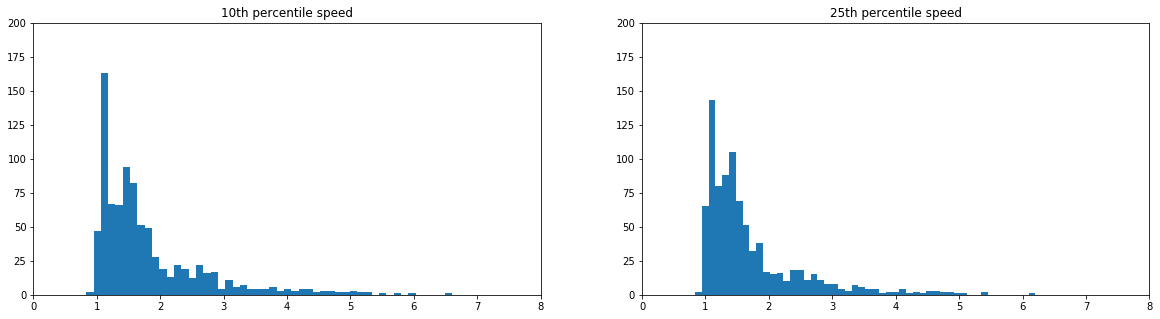

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].hist(am_peak.avg_tti_10, 50)
ax[0].set_title('10th percentile speed')
#ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 200)
ax[0].set_xlim(0, 8)
ax[1].hist(am_peak.avg_tti_25, 50)
ax[1].set_title('25th percentile speed')
ax[1].set_ylim(0, 200)
ax[1].set_xlim(0, 8)
#ax[1].get_xaxis().set_visible(False)
fig.show()

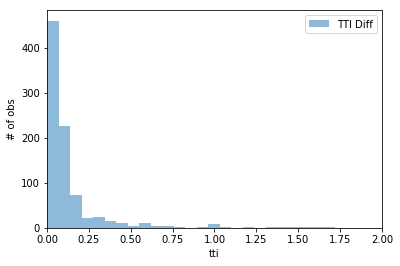

In [8]:
diff_am = pd.read_sql('''
with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )


,temp as (select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join highway_wls using (segment_id)
where time_bin <@ '[07:00:00, 10:00:00]'::timerange
group by segment_id)
select *,  (avg_tti_10 - avg_tti_25) as diffs from temp ''', con)

plt.hist(diff_am.diffs, 25, alpha=0.5, label='TTI Diff')
plt.xlabel('tti')
plt.ylabel('# of obs')
plt.xlim(0, 2)
plt.legend(loc='upper right')
plt.show()

### PM Peak TTI distribution differences

In [9]:
pm_peak = pd.read_sql('''with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )
select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join highway_wls using (segment_id)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
group by segment_id ''', con)

/etc/jupyterhub/.venv/lib/python3.5/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/etc/jupyterhub/.venv/lib/python3.5/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


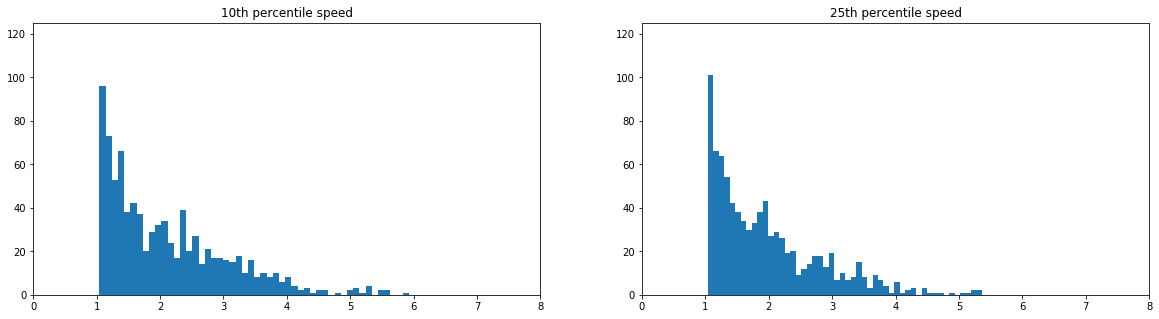

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].hist(pm_peak.avg_tti_10, 50)
ax[0].set_title('10th percentile speed')
#ax[0].get_xaxis().set_visible(False)
ax[0].set_ylim(0, 125)
ax[0].set_xlim(0, 8)
ax[1].hist(pm_peak.avg_tti_25, 50)
ax[1].set_title('25th percentile speed')
ax[1].set_ylim(0, 125)
ax[1].set_xlim(0, 8)
#ax[1].get_xaxis().set_visible(False)
fig.show()

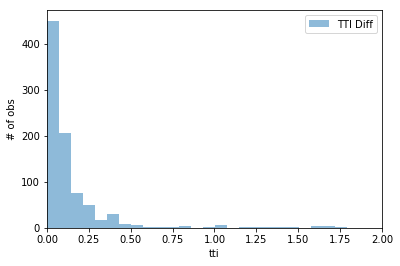

In [11]:
diff_pm = pd.read_sql('''with highway_wls as (
select distinct segment_id from congestion.segment_links_v4 
inner join
(select routing_grid.* from congestion.routing_grid
join here_gis.streets_att_18_3 on link_id =  (left(id::Text, -1))::numeric
where st_name = 'DON VALLEY PKWY' or st_name = 'HWY-404' or st_name ILIKE '%401%' or st_name = 'GARDINER EXPY') seg using (link_dir) )


,temp as (select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25 from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join highway_wls using (segment_id)
where time_bin <@ '[17:00:00, 19:00:00]'::timerange
group by segment_id)
select *,  (avg_tti_10 - avg_tti_25) as diffs from temp ''', con)

plt.hist(diff_pm.diffs, 25, alpha=0.5, label='TTI Diff')
plt.xlabel('tti')
plt.ylabel('# of obs')
plt.xlim(0, 2)
plt.legend(loc='upper right')
plt.show()

### Where are the top 10 highway segments that has the highest TTI difference?

#### Top 10 am peak diff

In [12]:
# basemap and centreline highway sql for mapping
basemap_query = '''select gis.geopandas_transform(ST_union(geom)) as geom from gis.neighbourhood_boundary'''
basemap = gpd.GeoDataFrame.from_postgis(basemap_query, con, geom_col='geom')
basemap = basemap.to_crs({'init' :'epsg:26917'})

centreline_query = '''select gis.geopandas_transform(ST_linemerge(geom)) as geom 
                    from gis.centreline where fcode_desc in ('Expressway','Expressway Ramp')
                    '''
highway = gpd.GeoDataFrame.from_postgis(centreline_query, con, geom_col='geom')
highway = highway.to_crs({'init' :'epsg:26917'})

/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


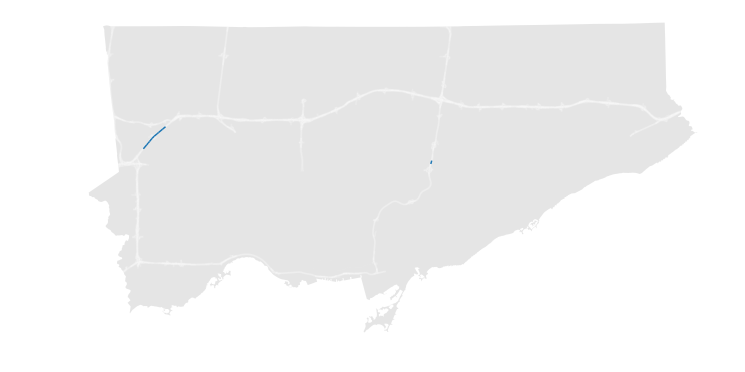

In [19]:
big_diff_am = '''with temp as (select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25, geom from congestion.metrics_v4_2019_af_v2 a 
            inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
            inner join congestion.segments_v4 using (segment_id)
            where time_bin <@ '[07:00:00, 10:00:00]'::timerange
            and segment_id in (2848,11523,10827,7494,11534,9575,4718,2847,9230,2265,2263,2306,4632,5316,11109,10884,606,11533,7501,5933,599,10893,6552,9775,10459,11732,2813,7201,11669,2310,5894,2672,2308,10024,8198,10882,11531,4679,9344,7373,2950,11100,3715,8034,2109,10826,9185,3622,4192,5769,4681,9343,11626,4201,6554,9203,9075,4650,2901,11555,9684,2899,10232,1922,10978,2261,2699,5249,11114,11692,9952,3381,8032,1920,12117,4628,2900,7122,4651,7239,4630,8009,8936,10383,3283,3823,11525,11661,10784,2666,3433,7241,5142,3380,9192,3924,8798,10128,4198,5252,2785,3104,2704,2902,9842,1335,2897,2267,8464,9014,6513,11514,3824,11540,5099,4184,1984,2300,2302,7214,10456,8971,12131,2673,10119,5597,9113,4634,6593,6775,11667,9317,9019,8935,9082,8799,1926,9110,4659,7229,2851,9194,4306,9981,2304,89,7267,11002,9017,8959,5315,1333,11551,3465,9057,6782,7215,4225,2949,1927,6574,914,31,7213,10001,3925,8716,9542,4302,2698,5098,5684,11591,3282,8398,1987,6575,3434,6560,4658,7371,11694,3463,10120,4652,12100,11535,11578,2167,4680,9275,8399,11186,6508,9046,10905,8969,4227,12091,2705,6562,2108,2816,3626,9170,10853,5308,5846,10817,2296,12074,4631,4709,10834,4304,2164,11597,1919,3470,3700,2266,11584,5527,8727,10847,2700,5844,10895,2896,1982,582,4199,5526,4461,8300,4194,2671,7384,4678,4224,4290,2910,8922,9274,9940,4226,4462,6576,10801,11691,7352,11532,4310,11554,1981,5146,6557,2703,7131,7500,10547,9485,7292,10286,9776,595,6371,2165,10023,4463,9885,11553,5862,5313,11689,4657,6538,10089,1985,10855,7493,3436,7499,2787,5870,4308,1681,5767,11491,8933,10009,3926,1924,11593,10854,10000,6577,7242,10966,8132,7169,9951,11680,12085,11004,11675,10010,1917,8240,10033,5865,5100,3384,8466,8221,8301,2789,9094,2112,10934,9361,9184,915,9273,10393,5532,1346,2859,596,5156,5863,1989,10877,7844,2701,7731,6558,7916,4301,2858,2101,3679,9371,3107,2668,2815,2783,8211,11195,7291,9129,10949,12090,5596,10950,11545,6784,7266,5309,9193,8454,10808,9683,9081,4330,7202,4182,8332,7372,8006,9318,4312,5683,4720,10124,6515,10194,10546,7353,3820,8624,5848,9202,3376,11603,12094,8968,4647,5097,3435,5910,8197,11562,11590,4311,2305,9364,4460,9362,5768,7231,5934,10008,10458,2814,2098,10123,7650,8097,2295,2104,12153,9918,9272,600,10874,9142,3106,5911,3382,2677,10842,9932,6596,9018,6561,10381,11099,12130,913,9365,6082,8974,3432,12088,11494,5180,3430,3379,7763,8455,8004,10880,8061,5598,85,6556,9093,11382,7375,6594,11566,6537,8970,10116,3713,8239,10630,6080,11684,11521,10892,1328,1986,4635,603,7351,10457,3103,9020,4653,8462,11510,7232,11596,7386,7730,9982,3718,11592,8003,5600,7982,6783,2297,10879,2103,7401,10833,3673,9342,10014,2914,8465,9278,11778,5147,8556,10030,11679,1990,7482,1330,9920,12078,2102,3623,2951,8657,2262,3619,4648,11194,11015,2669,7745,7481,4636,10794,10365,9372,3928,12072,10011,6559,1332,2850,9154,11687,11670,7442,2706,7383,8096,3102,4303,7170,6578,11526,9080,8216,1925,5254,4289,7374,9962,11504,2670,8658,6651,8562,11577,9541,5871,2105,4660,8423,3681,8978,9919,10865,8726,5253,12093,10366,7484,11000,9400,5931,1684,2903,5932,11112,11601,9433,2908,3717,10816,4677,5144,3678,11401,5980,11561,5158,2675,12140,12127,10115,4643,8217,5157,6509,2294,5178,11065,10392,5528,3675,5845,8094,8957,2299,2664,11608,10224,5847,12081,3927,9016,4644,5682,7230,7845,5981,2947,9074,5874,2857,11196,7405,8960,5312,7290,9231,3699,3284,7502,8397,1983,6368,8555,11511,9939,7121,3922,11541,3701,605,1327,2160,604,2107,11137,6507,3627,8299,11209,8564,8934,10223,6563,6650,7651,7682,6555,7385,2110,3615,5594,2303,5766,10885,5145,7621,9143,11623,2264,2916,8005,4196,9484,8958,8241,3788,4197,4307,5765,5310,7289,7288,8800,5595,10032,3437,8033,9186,3716,11736,10783,4656,10013,7402,4219,5182,7744,7404,7441,5849,5314,9029,11564,5155,5311,4186,2100,2790,10367,5250,11527,9961,8463,4708,7679,2161,3787,9401,1325,1686,5179,5143,10803,3702,9934,9983,7132,2907,9131,11490,9276,11552,10106,12103,11784,9434,2860,8424,2298,5872,7764,5599,9921,9436,5251,10105,3617,11016,8331,11110,11522,10031,7240,10631,10979,4654,1921,6809,6514,11543,2898,11544,4711,4286,8007,3672,11021,10843,11503,11520,11693,7167,2707,6774,8133,9469,8923,1347,4646,6551,8976,8924,9111,2674,1688,8717,607,1683,8194,2099,3680,6516,8563,9015,10368,2948,3624,11660,10866,2812,3462,11663,7235,10786,8195,3923,4195,7761,2943,3620,11217,3464,5979,10548,6536,5896,7915,10894,12118,4649,9201,2667,10881,11542,3438,3676,9049,7917,11495,4288,8926,10545,4221,3616,4716,3621,3466,6081,2307,8975,2913,2111,9141,11604,11685,10045,11513,6084,8353,10122,11676,6370,3677,3625,2915,11187,4223,11113,5873,4707,3378,2166,1336,8095,9112,2852,3377,2912,4222,1679,10044,8925,8977,6553,10802,7123,583,10793,9155,7264,9435,1685,9886,4459,2784,10017,9941,5181,2849,10019,11785,10976,7200,10878,10856,3628,4183,2905,7168,4181,5877,2945,11688,11609,45,2904,10873,3468,6773,2861,11563,3105,7503,5531,2106,1923,3618,10018,9050,8108,8801,3821,10234,5978,9187,10841,3467,7263,6652,5533,4329,2944,8656,4328,8425,9130,4284,10129,11622,7265,11574,3822,4719,4645,10967,11020,10742,9048,9084,5159,4717,5875,4706,2909,8210,4633,597,11536,9056,11210,3431,2946,2309,7234,10844,5177,598,1988,5909,5935,6781,12115,11600,8396,3280,3279,8212,10121,4655,8139,1334,6808,916,7681,11066,584,9028,1329,11111,4715,10450,3469,602,1689,6083,2786,1687,3281,2163,9128,7622,4629,1682,2268,8220,6539,4220,9933,10195,8131,1326,10549,7216,2788,7762,8219,4285,12092,10962,4710,9843,11524,1991,10090,6506,7133,917,10287,2906,10998,7403,2663,2911,11383,7233,10997,11619,10451,9079,9153,8110,6776,6369,10999,3719,9277,7983,5864,9171,10012,1918,7238,4309,1331,12113,8093,4305,7124,10233,12152,10795,10785,4464,10107,12082,4287,8623,11537,4200,601,7483,11594,3674,8298,8062,4193,5530,7680,8111,8196,5876,5912,3714,12089,8352,6595,3383,8008,6535,5895,10484,1680,2162,2676,8109,11565,11662,2301,8140,2702,11003,9345,8141,4185,8218)
            group by segment_id, geom)
            select segment_id, avg_tti_10, avg_tti_25, (avg_tti_10 - avg_tti_25) as diffs, gis.geopandas_transform(ST_linemerge(geom)) as geom from temp 
            where (avg_tti_10 - avg_tti_25) is not null
            order by diffs desc limit 10'''

segments_am = gpd.GeoDataFrame.from_postgis(big_diff_am, con, geom_col='geom')
segments_am = segments_am.to_crs({'init' :'epsg:26917'})

f, ax = plt.subplots(figsize=(12,12))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
highway.plot(ax=ax, color = 'white', alpha = 0.2)
segments_am.plot(ax=ax)
ax.set_axis_off()

In [20]:
segments_am

,segment_id,avg_tti_10,avg_tti_25,diffs,geom
0,11490,3.734323,2.015872,1.718451,"LINESTRING (2080689.493 4411914.551, 2080800.7..."
1,11491,3.788924,2.135804,1.653120,"LINESTRING (2080482.401 4411736.290, 2080489.6..."
2,7132,3.527280,1.879243,1.648037,"LINESTRING (2080800.766 4412008.289, 2080822.2..."
3,10786,3.919254,2.342551,1.576703,"LINESTRING (2080333.124 4411584.485, 2080355.0..."
4,10785,4.048638,2.542779,1.505859,"LINESTRING (2080145.797 4411360.686, 2080179.6..."
5,5769,4.210734,2.807617,1.403117,"LINESTRING (2080059.620 4411258.113, 2080097.8..."
6,5766,4.335618,3.007143,1.328475,"LINESTRING (2079950.586 4411127.686, 2079974.5..."
7,7131,2.857804,1.646492,1.211312,"LINESTRING (2081074.230 4412238.274, 2081093.1..."
8,5768,4.501549,3.425834,1.075715,"LINESTRING (2079722.565 4410853.616, 2079774.2..."
9,4718,2.638529,1.603518,1.035011,"LINESTRING (2099944.795 4409789.560, 2099970.0..."


/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


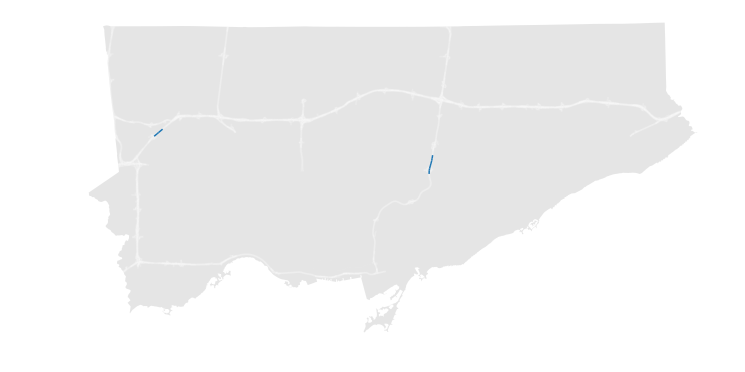

In [22]:
big_diff_pm = '''with temp as (select segment_id, avg(a.tti_corr) as avg_tti_10, avg(b.tti_corr) as avg_tti_25, geom from congestion.metrics_v4_2019_af_v2 a 
inner join congestion.metrics_v4_2019_af b using (segment_id, time_bin)
inner join congestion.segments_v4 using (segment_id)
where time_bin <@ '[16:00:00, 19:00:00]'::timerange
 and segment_id in (2848,11523,10827,7494,11534,9575,4718,2847,9230,2265,2263,2306,4632,5316,11109,10884,606,11533,7501,5933,599,10893,6552,9775,10459,11732,2813,7201,11669,2310,5894,2672,2308,10024,8198,10882,11531,4679,9344,7373,2950,11100,3715,8034,2109,10826,9185,3622,4192,5769,4681,9343,11626,4201,6554,9203,9075,4650,2901,11555,9684,2899,10232,1922,10978,2261,2699,5249,11114,11692,9952,3381,8032,1920,12117,4628,2900,7122,4651,7239,4630,8009,8936,10383,3283,3823,11525,11661,10784,2666,3433,7241,5142,3380,9192,3924,8798,10128,4198,5252,2785,3104,2704,2902,9842,1335,2897,2267,8464,9014,6513,11514,3824,11540,5099,4184,1984,2300,2302,7214,10456,8971,12131,2673,10119,5597,9113,4634,6593,6775,11667,9317,9019,8935,9082,8799,1926,9110,4659,7229,2851,9194,4306,9981,2304,89,7267,11002,9017,8959,5315,1333,11551,3465,9057,6782,7215,4225,2949,1927,6574,914,31,7213,10001,3925,8716,9542,4302,2698,5098,5684,11591,3282,8398,1987,6575,3434,6560,4658,7371,11694,3463,10120,4652,12100,11535,11578,2167,4680,9275,8399,11186,6508,9046,10905,8969,4227,12091,2705,6562,2108,2816,3626,9170,10853,5308,5846,10817,2296,12074,4631,4709,10834,4304,2164,11597,1919,3470,3700,2266,11584,5527,8727,10847,2700,5844,10895,2896,1982,582,4199,5526,4461,8300,4194,2671,7384,4678,4224,4290,2910,8922,9274,9940,4226,4462,6576,10801,11691,7352,11532,4310,11554,1981,5146,6557,2703,7131,7500,10547,9485,7292,10286,9776,595,6371,2165,10023,4463,9885,11553,5862,5313,11689,4657,6538,10089,1985,10855,7493,3436,7499,2787,5870,4308,1681,5767,11491,8933,10009,3926,1924,11593,10854,10000,6577,7242,10966,8132,7169,9951,11680,12085,11004,11675,10010,1917,8240,10033,5865,5100,3384,8466,8221,8301,2789,9094,2112,10934,9361,9184,915,9273,10393,5532,1346,2859,596,5156,5863,1989,10877,7844,2701,7731,6558,7916,4301,2858,2101,3679,9371,3107,2668,2815,2783,8211,11195,7291,9129,10949,12090,5596,10950,11545,6784,7266,5309,9193,8454,10808,9683,9081,4330,7202,4182,8332,7372,8006,9318,4312,5683,4720,10124,6515,10194,10546,7353,3820,8624,5848,9202,3376,11603,12094,8968,4647,5097,3435,5910,8197,11562,11590,4311,2305,9364,4460,9362,5768,7231,5934,10008,10458,2814,2098,10123,7650,8097,2295,2104,12153,9918,9272,600,10874,9142,3106,5911,3382,2677,10842,9932,6596,9018,6561,10381,11099,12130,913,9365,6082,8974,3432,12088,11494,5180,3430,3379,7763,8455,8004,10880,8061,5598,85,6556,9093,11382,7375,6594,11566,6537,8970,10116,3713,8239,10630,6080,11684,11521,10892,1328,1986,4635,603,7351,10457,3103,9020,4653,8462,11510,7232,11596,7386,7730,9982,3718,11592,8003,5600,7982,6783,2297,10879,2103,7401,10833,3673,9342,10014,2914,8465,9278,11778,5147,8556,10030,11679,1990,7482,1330,9920,12078,2102,3623,2951,8657,2262,3619,4648,11194,11015,2669,7745,7481,4636,10794,10365,9372,3928,12072,10011,6559,1332,2850,9154,11687,11670,7442,2706,7383,8096,3102,4303,7170,6578,11526,9080,8216,1925,5254,4289,7374,9962,11504,2670,8658,6651,8562,11577,9541,5871,2105,4660,8423,3681,8978,9919,10865,8726,5253,12093,10366,7484,11000,9400,5931,1684,2903,5932,11112,11601,9433,2908,3717,10816,4677,5144,3678,11401,5980,11561,5158,2675,12140,12127,10115,4643,8217,5157,6509,2294,5178,11065,10392,5528,3675,5845,8094,8957,2299,2664,11608,10224,5847,12081,3927,9016,4644,5682,7230,7845,5981,2947,9074,5874,2857,11196,7405,8960,5312,7290,9231,3699,3284,7502,8397,1983,6368,8555,11511,9939,7121,3922,11541,3701,605,1327,2160,604,2107,11137,6507,3627,8299,11209,8564,8934,10223,6563,6650,7651,7682,6555,7385,2110,3615,5594,2303,5766,10885,5145,7621,9143,11623,2264,2916,8005,4196,9484,8958,8241,3788,4197,4307,5765,5310,7289,7288,8800,5595,10032,3437,8033,9186,3716,11736,10783,4656,10013,7402,4219,5182,7744,7404,7441,5849,5314,9029,11564,5155,5311,4186,2100,2790,10367,5250,11527,9961,8463,4708,7679,2161,3787,9401,1325,1686,5179,5143,10803,3702,9934,9983,7132,2907,9131,11490,9276,11552,10106,12103,11784,9434,2860,8424,2298,5872,7764,5599,9921,9436,5251,10105,3617,11016,8331,11110,11522,10031,7240,10631,10979,4654,1921,6809,6514,11543,2898,11544,4711,4286,8007,3672,11021,10843,11503,11520,11693,7167,2707,6774,8133,9469,8923,1347,4646,6551,8976,8924,9111,2674,1688,8717,607,1683,8194,2099,3680,6516,8563,9015,10368,2948,3624,11660,10866,2812,3462,11663,7235,10786,8195,3923,4195,7761,2943,3620,11217,3464,5979,10548,6536,5896,7915,10894,12118,4649,9201,2667,10881,11542,3438,3676,9049,7917,11495,4288,8926,10545,4221,3616,4716,3621,3466,6081,2307,8975,2913,2111,9141,11604,11685,10045,11513,6084,8353,10122,11676,6370,3677,3625,2915,11187,4223,11113,5873,4707,3378,2166,1336,8095,9112,2852,3377,2912,4222,1679,10044,8925,8977,6553,10802,7123,583,10793,9155,7264,9435,1685,9886,4459,2784,10017,9941,5181,2849,10019,11785,10976,7200,10878,10856,3628,4183,2905,7168,4181,5877,2945,11688,11609,45,2904,10873,3468,6773,2861,11563,3105,7503,5531,2106,1923,3618,10018,9050,8108,8801,3821,10234,5978,9187,10841,3467,7263,6652,5533,4329,2944,8656,4328,8425,9130,4284,10129,11622,7265,11574,3822,4719,4645,10967,11020,10742,9048,9084,5159,4717,5875,4706,2909,8210,4633,597,11536,9056,11210,3431,2946,2309,7234,10844,5177,598,1988,5909,5935,6781,12115,11600,8396,3280,3279,8212,10121,4655,8139,1334,6808,916,7681,11066,584,9028,1329,11111,4715,10450,3469,602,1689,6083,2786,1687,3281,2163,9128,7622,4629,1682,2268,8220,6539,4220,9933,10195,8131,1326,10549,7216,2788,7762,8219,4285,12092,10962,4710,9843,11524,1991,10090,6506,7133,917,10287,2906,10998,7403,2663,2911,11383,7233,10997,11619,10451,9079,9153,8110,6776,6369,10999,3719,9277,7983,5864,9171,10012,1918,7238,4309,1331,12113,8093,4305,7124,10233,12152,10795,10785,4464,10107,12082,4287,8623,11537,4200,601,7483,11594,3674,8298,8062,4193,5530,7680,8111,8196,5876,5912,3714,12089,8352,6595,3383,8008,6535,5895,10484,1680,2162,2676,8109,11565,11662,2301,8140,2702,11003,9345,8141,4185,8218)
           group by segment_id, geom)
select segment_id, avg_tti_10, avg_tti_25, (avg_tti_10 - avg_tti_25) as diffs,  gis.geopandas_transform(ST_linemerge(geom)) as geom from temp 
where (avg_tti_10 - avg_tti_25)  is not null order by diffs desc  limit 10'''
segments_pm = gpd.GeoDataFrame.from_postgis(big_diff_pm, con, geom_col='geom')
segments_pm = segments_pm.to_crs({'init' :'epsg:26917'})

f, ax = plt.subplots(figsize=(12,12))

basemap.plot(ax=ax, color = 'grey', alpha=0.2)
highway.plot(ax=ax, color = 'white', alpha = 0.2)
segments_pm.plot(ax=ax)
ax.set_axis_off()


In [23]:
segments_pm

,segment_id,avg_tti_10,avg_tti_25,diffs,geom
0,9028,5.336427,3.392023,1.944404,"LINESTRING (2099861.977 4409482.683, 2099874.4..."
1,4715,4.954354,3.097853,1.856501,"LINESTRING (2099907.122 4409651.240, 2099909.0..."
2,9029,5.493096,3.681958,1.811137,"LINESTRING (2099833.736 4409317.132, 2099834.6..."
3,7132,3.784974,2.016536,1.768438,"LINESTRING (2080800.766 4412008.289, 2080822.2..."
4,4718,4.485119,2.725749,1.759370,"LINESTRING (2099944.795 4409789.560, 2099970.0..."
5,11490,3.710224,2.002863,1.707361,"LINESTRING (2080689.493 4411914.551, 2080800.7..."
6,4716,4.287271,2.584840,1.702431,"LINESTRING (2100006.367 4410026.266, 2100019.9..."
7,4717,4.346152,2.652806,1.693346,"LINESTRING (2100038.212 4410195.369, 2100046.5..."
8,11491,3.535867,1.993156,1.542710,"LINESTRING (2080482.401 4411736.290, 2080489.6..."
9,11543,5.544632,4.035196,1.509436,"LINESTRING (2099831.684 4409087.940, 2099828.6..."


# TTI AM Peak 

### With Percentile 10th as highway baseline

In [15]:
tti_am = '''with temp as (select segment_id, avg(tti_corr) as avg_tti, geom from congestion.metrics_v4_2019_af_v2
                 inner join congestion.segments_v4 using (segment_id)
                 where time_bin <@ '[07:00:00, 10:00:00]'::timerange
                 group by segment_id, geom)
            , cat as (select segment_id, id, col, avg_tti, (ST_dump(st_linemerge(geom))).geom as geom from temp
                     inner join (select row_number() over () as id, col, range from congestion.colour_range )b on avg_tti::numeric <@ range)
            select segment_id, gis.geopandas_transform(st_offsetcurve(geom, -0.0006)) as geom,	
			avg_tti, id, col 
			from cat
			where ST_astext(st_offsetcurve(((st_linemerge(geom))), -0.0006)) != 'LINESTRING EMPTY' and ST_geometrytype(geom) = 'ST_LineString' 
            order by id
                '''
tti_am_segments = gpd.GeoDataFrame.from_postgis(tti_am, con, geom_col='geom')
tti_am_segments = tti_am_segments.to_crs({'init' :'epsg:26917'})

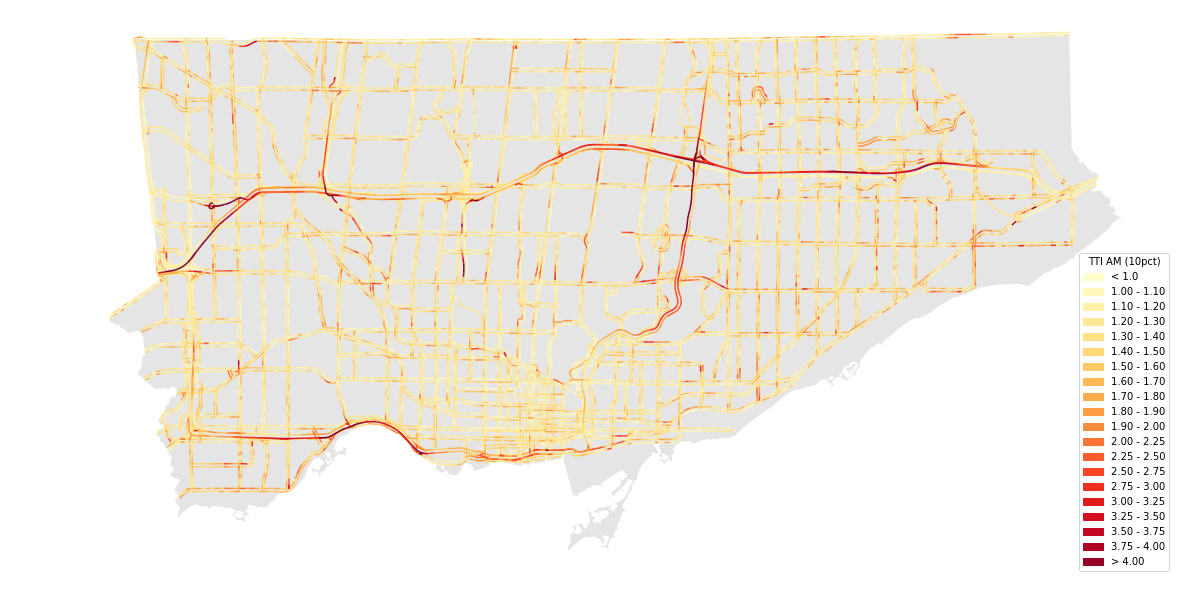

In [16]:
tti_am_segments.col.unique()

f, ax = plt.subplots(figsize=(20,20))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
tti_am_segments.plot(column = 'id', ax=ax, cmap='YlOrRd')

NUM_COLORS = len(tti_am_segments.col.unique())
cm = plt.get_cmap('YlOrRd')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
handles, labels = [], []

legend_id = tti_am_segments.col.unique()
for i in range(0, NUM_COLORS):
    label_name = legend_id[i]
    handles.append(mpl.patches.Patch(color=colors[i],label=label_name))
ax.legend(handles=handles,loc='lower right', ncol=1, title = 'TTI AM (10pct)')    
ax.set_axis_off()

### With Percentile 25th as highway baseline

In [520]:
tti_am_25 = '''with temp as (select segment_id, avg(tti_corr) as avg_tti, geom from congestion.metrics_v4_2019_af
                 inner join congestion.segments_v4 using (segment_id)
                 where time_bin <@ '[07:00:00, 10:00:00]'::timerange
                 group by segment_id, geom)
            , cat as (select segment_id, id, col, avg_tti, (ST_dump(st_linemerge(geom))).geom as geom from temp
                     inner join (select row_number() over () as id, col, range from congestion.colour_range )b on avg_tti::numeric <@ range)
            select segment_id, gis.geopandas_transform(st_offsetcurve(geom, -0.0006)) as geom,	
			avg_tti, id, col 
			from cat
			where ST_astext(st_offsetcurve(((st_linemerge(geom))), -0.0006)) != 'LINESTRING EMPTY' and ST_geometrytype(geom) = 'ST_LineString' 
            order by id
                '''
tti_am_segments_25 = gpd.GeoDataFrame.from_postgis(tti_am_25, con, geom_col='geom')
tti_am_segments_25 = tti_am_segments_25.to_crs({'init' :'epsg:26917'})

/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


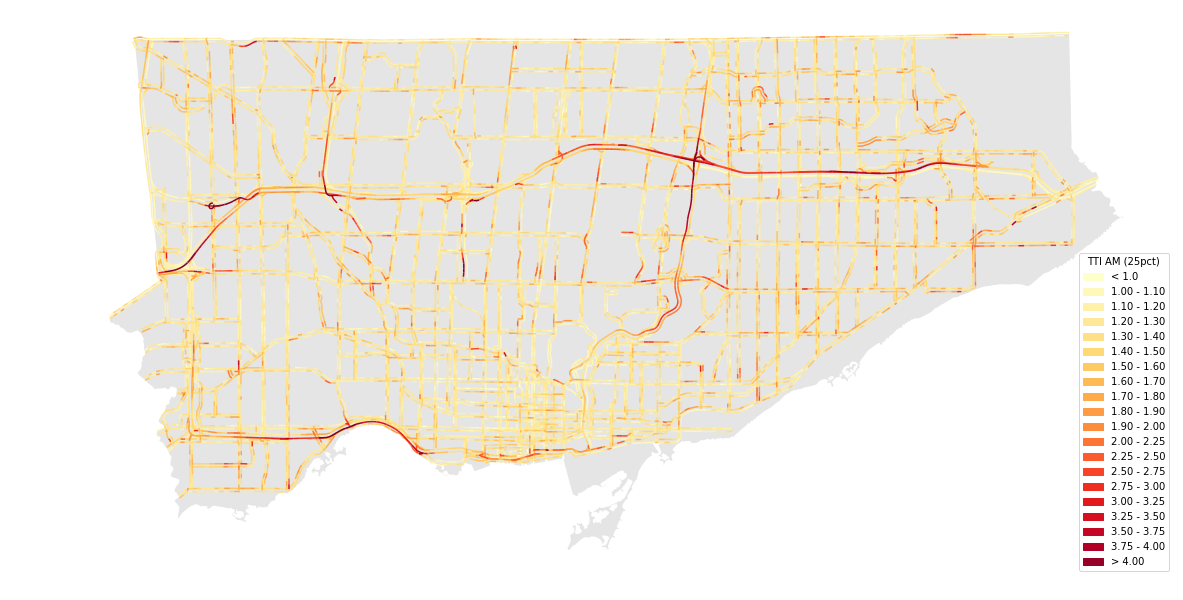

In [538]:
tti_am_segments_25.col.unique()

f, ax = plt.subplots(figsize=(20,20))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
tti_am_segments_25.plot(column = 'id', ax=ax, cmap='YlOrRd')

NUM_COLORS = len(tti_am_segments.col.unique())
cm = plt.get_cmap('YlOrRd')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
handles, labels = [], []

legend_id = tti_am_segments_25.col.unique()
for i in range(0, NUM_COLORS):
    label_name = legend_id[i]
    handles.append(mpl.patches.Patch(color=colors[i],label=label_name))
ax.legend(handles=handles,loc='lower right', ncol=1, title = 'TTI AM (25pct)')    
ax.set_axis_off()

# TTI PM Peak 

### With Percentile 10th as highway baseline

In [17]:
tti_pm = '''with temp as (select segment_id, avg(tti_corr) as avg_tti, geom from congestion.metrics_v4_2019_af_v2
                 inner join congestion.segments_v4 using (segment_id)
                 where time_bin <@ '[16:00:00, 19:00:00]'::timerange
                 group by segment_id, geom)
            , cat as (select segment_id, id, col, avg_tti, (ST_dump(st_linemerge(geom))).geom as geom from temp
                     inner join (select row_number() over () as id, col, range from congestion.colour_range )b on avg_tti::numeric <@ range)
            select segment_id, gis.geopandas_transform(st_offsetcurve(geom, -0.0006)) as geom,	
			avg_tti, id, col 
			from cat
			where ST_astext(st_offsetcurve(((st_linemerge(geom))), -0.0006)) != 'LINESTRING EMPTY' and ST_geometrytype(geom) = 'ST_LineString' 
            order by id
                '''
tti_pm_segments = gpd.GeoDataFrame.from_postgis(tti_pm, con, geom_col='geom')
tti_pm_segments = tti_pm_segments.to_crs({'init' :'epsg:26917'})

/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


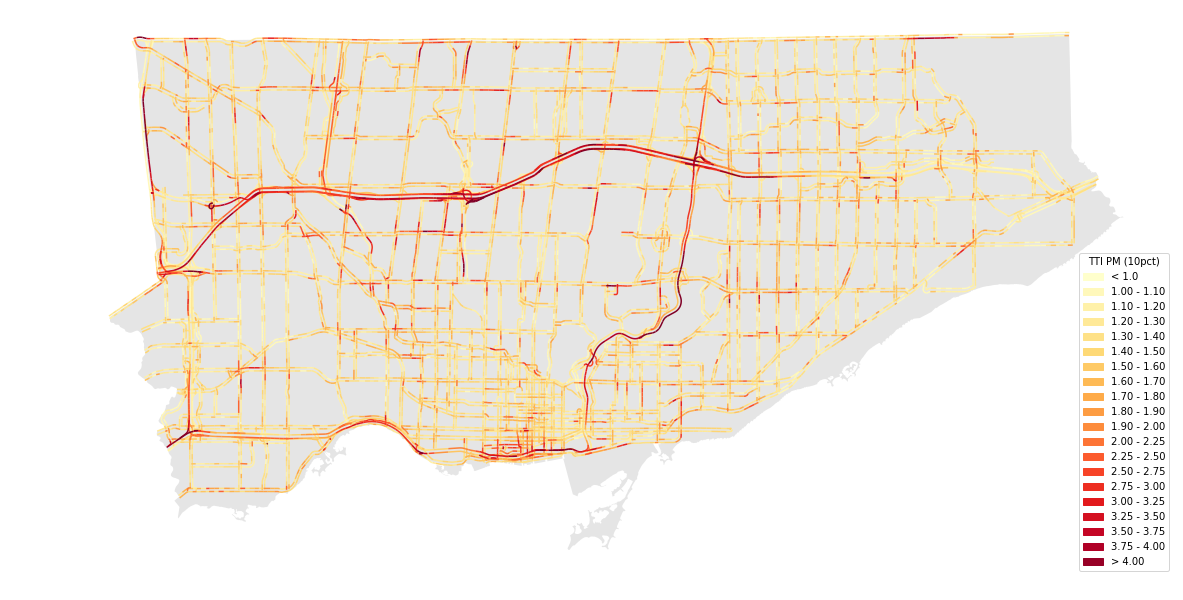

In [18]:
tti_pm_segments.col.unique()

f, ax = plt.subplots(figsize=(20,20))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
tti_pm_segments.plot(column = 'id', ax=ax, cmap='YlOrRd')

NUM_COLORS = len(tti_pm_segments.col.unique())
cm = plt.get_cmap('YlOrRd')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
handles, labels = [], []

legend_id = tti_pm_segments.col.unique()
for i in range(0, NUM_COLORS):
    label_name = legend_id[i]
    handles.append(mpl.patches.Patch(color=colors[i],label=label_name))
ax.legend(handles=handles,loc='lower right', ncol=1, title = 'TTI PM (10pct)')    
ax.set_axis_off()

### With Percentile 25th as highway baseline

In [530]:
tti_pm_25 = '''with temp as (select segment_id, avg(tti_corr) as avg_tti, geom from congestion.metrics_v4_2019_af
                 inner join congestion.segments_v4 using (segment_id)
                 where time_bin <@ '[16:00:00, 19:00:00]'::timerange
                 group by segment_id, geom)
            , cat as (select segment_id, id, col, avg_tti, (ST_dump(st_linemerge(geom))).geom as geom from temp
                     inner join (select row_number() over () as id, col, range from congestion.colour_range )b on avg_tti::numeric <@ range)
            select segment_id, gis.geopandas_transform(st_offsetcurve(geom, -0.0006)) as geom,	
			avg_tti, id, col 
			from cat
			where ST_astext(st_offsetcurve(((st_linemerge(geom))), -0.0006)) != 'LINESTRING EMPTY' and ST_geometrytype(geom) = 'ST_LineString' 
            order by id
                '''
tti_pm_segments_25 = gpd.GeoDataFrame.from_postgis(tti_pm_25, con, geom_col='geom')
tti_pm_segments_25 = tti_pm_segments_25.to_crs({'init' :'epsg:26917'})

/etc/jupyterhub/.venv/lib/python3.5/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


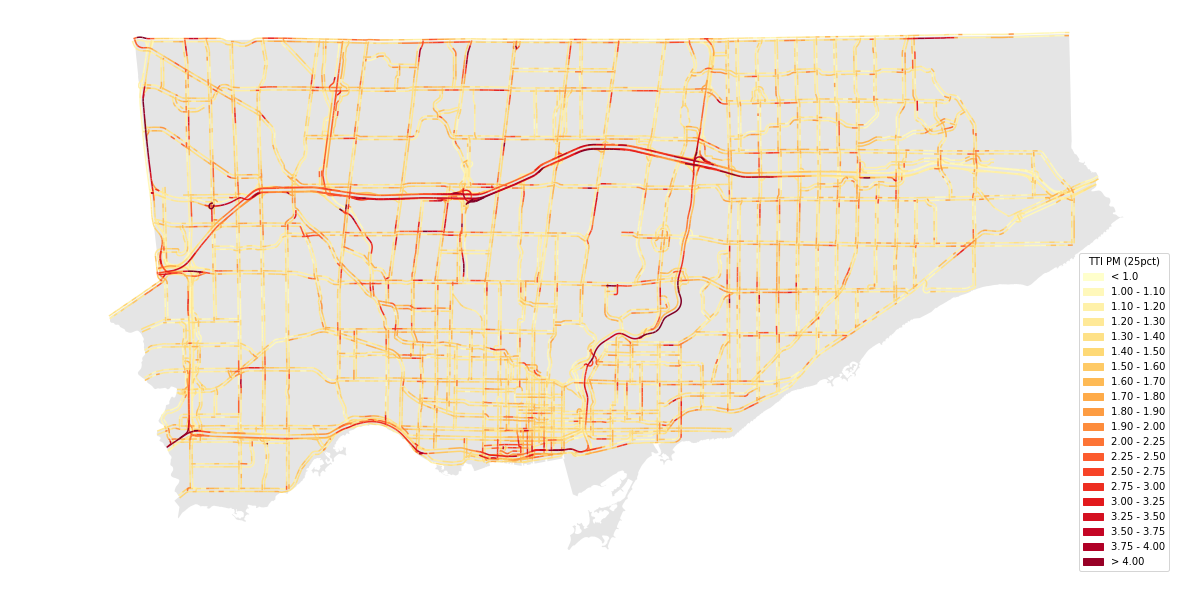

In [536]:
tti_pm_segments_25.col.unique()

f, ax = plt.subplots(figsize=(20,20))
basemap.plot(ax=ax, color = 'grey', alpha=0.2)
tti_pm_segments_25.plot(column = 'id', ax=ax, cmap='YlOrRd')

NUM_COLORS = len(tti_pm_segments_25.col.unique())
cm = plt.get_cmap('YlOrRd')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
handles, labels = [], []

legend_id = tti_pm_segments_25.col.unique()
for i in range(0, NUM_COLORS):
    label_name = legend_id[i]
    handles.append(mpl.patches.Patch(color=colors[i],label=label_name))
ax.legend(handles=handles,loc='lower right', ncol=1, title = 'TTI PM (25pct)')    
ax.set_axis_off()